## Data Preprocessing Lab: Time Series and Text (NLP)

This lab covers two core preprocessing workflows:

1. Time Series preprocessing (indexing, resampling, handling missing data)
2. Text preprocessing (cleaning, tokenization, vectorization)

## Part 1: Time Series Preprocessing

We will use a synthetic dataset simulating daily temperature readings over several months.

In [36]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display_webp

# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-04-30', freq='D')
temperature = np.random.normal(loc=15, scale=5, size=len(date_rng))
df_ts = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df_ts.loc[np.random.choice(df_ts.index, 10), 'Temperature'] = np.nan  # add missing values
df_ts.set_index('Date', inplace=True)

df_ts.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-02,14.308678
2023-01-03,18.238443
2023-01-04,22.615149
2023-01-05,13.829233


### Plot the Time Series

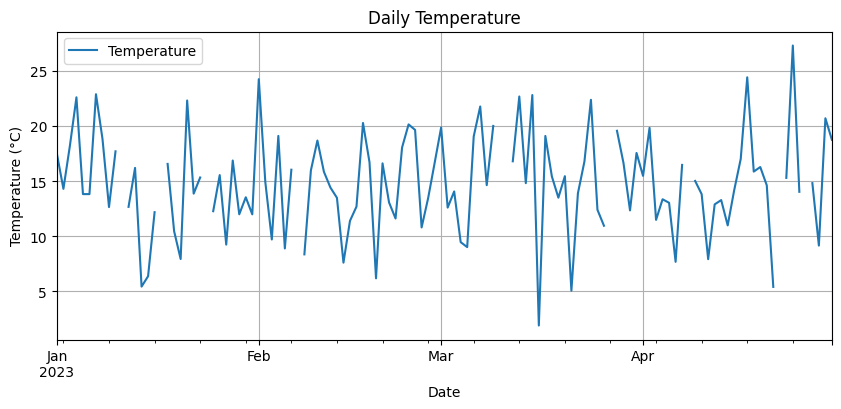

In [20]:
import matplotlib.pyplot as plt

df_ts.plot(figsize=(10, 4), title='Daily Temperature')
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

### Fill Missing Values and Resample

In [21]:
# Interpolate missing values
df_filled = df_ts.interpolate()

# Resample to weekly average
df_weekly = df_filled.resample('W').mean()

df_weekly.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-08,17.793437
2023-01-15,12.321097
2023-01-22,13.962489
2023-01-29,13.585505


### Exercise 1: Time Series Handling


- Count the number of missing values in `df_ts`
- Fill missing values using forward fill instead of interpolation
- Plot both original and filled time series for comparison


In [34]:
# TODO: Fill missing values using ffill
missing_count = df_ts['Temperature'].isnull().sum()
total_count = len(df_ts)
missing_percentage = (missing_count / total_count) * 100
print(f"Total missing values: {missing_count} and missing percentage: {missing_percentage:.2f}%")

df_ffill = df_ts.ffill()
# Display dataframe after ffill method applied
display(df_ffill)

Total missing values: 10 and missing percentage: 8.33%


,Temperature
Date,
2023-01-01,17.483571
2023-01-02,14.308678
2023-01-03,18.238443
2023-01-04,22.615149
2023-01-05,13.829233
...,...
2023-04-26,14.038195
2023-04-27,14.826441
2023-04-28,9.156610


,Temperature
Date,
2023-01-01,17.483571
2023-01-02,14.308678
2023-01-03,18.238443
2023-01-04,22.615149
2023-01-05,13.829233
...,...
2023-04-26,14.038195
2023-04-27,14.826441
2023-04-28,9.156610


## Part 2: Text Preprocessing (NLP)

We will use a small corpus of text to explore common text preprocessing techniques.

In [23]:
documents = [
    "Natural Language Processing (NLP) is a subfield of AI.",
    "It focuses on understanding and generating human language.",
    "Text preprocessing is a crucial step in NLP pipelines.",
    "Common techniques include tokenization, stopword removal, and stemming."
]

### Basic Text Cleaning

In [24]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

cleaned_docs = [clean_text(doc) for doc in documents]
cleaned_docs

['natural language processing nlp is a subfield of ai',
 'it focuses on understanding and generating human language',
 'text preprocessing is a crucial step in nlp pipelines',
 'common techniques include tokenization stopword removal and stemming']

### Tokenization and Stopword Removal

In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def tokenize(text):
    return [word for word in text.split() if word not in ENGLISH_STOP_WORDS]

tokenized_docs = [tokenize(doc) for doc in cleaned_docs]
tokenized_docs

[['natural', 'language', 'processing', 'nlp', 'subfield', 'ai'],
 ['focuses', 'understanding', 'generating', 'human', 'language'],
 ['text', 'preprocessing', 'crucial', 'step', 'nlp', 'pipelines'],
 ['common',
  'techniques',
  'include',
  'tokenization',
  'stopword',
  'removal',
  'stemming']]

### Vectorization with CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(cleaned_docs)
pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

,ai,and,common,crucial,focuses,generating,human,in,include,is,...,processing,removal,stemming,step,stopword,subfield,techniques,text,tokenization,understanding
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


### Exercise 2: Text Preprocessing


- Write a function to clean and tokenize a list of new documents
- Use `TfidfVectorizer` to vectorize them
- Print the TF-IDF matrix


In [27]:
# TODO: Add your new documents and preprocess them
from sklearn.feature_extraction.text import TfidfVectorizer

new_docs = ["Language models are powerful tools.", "Preprocessing affects model performance."]
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(new_docs)
pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,affects,language,model,models,performance,powerful,preprocessing,tools
0,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5
1,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0


=== EXERCISE 2: TEXT PREPROCESSING ===
Original Documents:
1. Language models are powerful tools for natural language processing.
2. Preprocessing affects model performance significantly in NLP tasks.
3. Text cleaning and tokenization are essential steps in data preparation.
4. Machine learning algorithms require clean, structured input data.
5. Feature extraction transforms raw text into numerical representations.

1. CLEANING AND TOKENIZATION:
Cleaned Documents:
1. language models powerful tools natural language processing
2. preprocessing affects model performance significantly nlp tasks
3. text cleaning tokenization essential steps data preparation
4. machine learning algorithms require clean structured input data
5. feature extraction transforms raw text numerical representations

Tokenized Documents:
1. ['language', 'models', 'powerful', 'tools', 'natural', 'language', 'processing']
2. ['preprocessing', 'affects', 'model', 'performance', 'significantly', 'nlp', 'tasks']
3. ['text

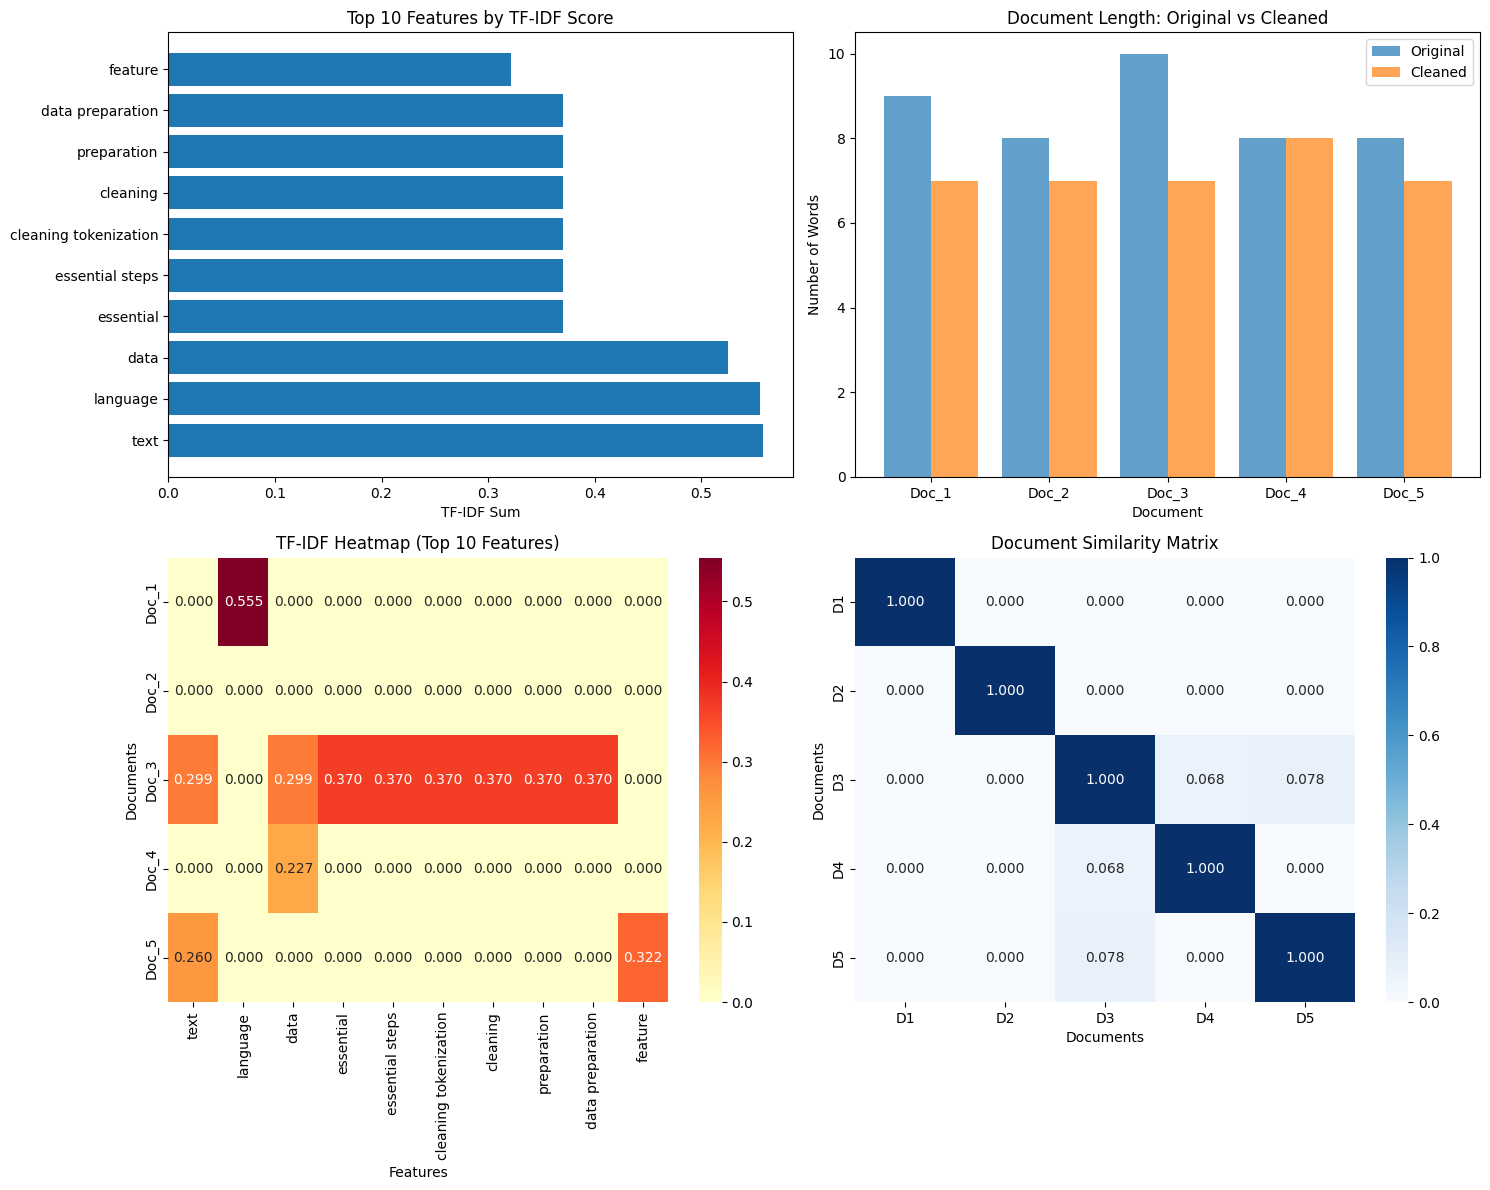

In [37]:
# Exercise 2: Text Preprocessing - Complete Solution
# =================================================



print("=== EXERCISE 2: TEXT PREPROCESSING ===")

# Sample documents for the exercise
new_docs = [
    "Language models are powerful tools for natural language processing.",
    "Preprocessing affects model performance significantly in NLP tasks.",
    "Text cleaning and tokenization are essential steps in data preparation.",
    "Machine learning algorithms require clean, structured input data.",
    "Feature extraction transforms raw text into numerical representations."
]

print("Original Documents:")
for i, doc in enumerate(new_docs, 1):
    print(f"{i}. {doc}")
print()

# =============================================================================
# TASK 1: CREATE A COMPREHENSIVE CLEANING AND TOKENIZATION FUNCTION
# =============================================================================

def clean_and_tokenize(documents,
                      lowercase=True,
                      remove_punctuation=True,
                      remove_stopwords=True,
                      min_word_length=2,
                      remove_numbers=False):


    cleaned_docs = []
    tokenized_docs = []
    cleaning_stats = {
        'original_words': 0,
        'cleaned_words': 0,
        'removed_punctuation': 0,
        'removed_stopwords': 0,
        'removed_short_words': 0,
        'removed_numbers': 0
    }

    # Define stop words (using sklearn's list + custom additions)
    stop_words = set(ENGLISH_STOP_WORDS) | {'would', 'could', 'should', 'may', 'might'}

    for doc in documents:
        original_words = len(doc.split())
        cleaning_stats['original_words'] += original_words

        # Step 1: Lowercase conversion
        if lowercase:
            doc = doc.lower()

        # Step 2: Remove URLs, emails, and special patterns
        doc = re.sub(r'http\S+|www\S+|https\S+', '', doc, flags=re.MULTILINE)
        doc = re.sub(r'\S+@\S+', '', doc)

        # Step 3: Remove or replace punctuation
        if remove_punctuation:
            # Count punctuation before removal
            punct_count = sum(1 for char in doc if char in string.punctuation)
            cleaning_stats['removed_punctuation'] += punct_count

            # Remove punctuation but keep spaces
            doc = re.sub(r'[^\w\s]', ' ', doc)

        # Step 4: Remove extra whitespace
        doc = re.sub(r'\s+', ' ', doc).strip()

        # Step 5: Tokenization
        tokens = doc.split()

        # Step 6: Filter tokens
        filtered_tokens = []
        for token in tokens:
            # Remove numbers if requested
            if remove_numbers and token.isdigit():
                cleaning_stats['removed_numbers'] += 1
                continue

            # Remove short words
            if len(token) < min_word_length:
                cleaning_stats['removed_short_words'] += 1
                continue

            # Remove stop words
            if remove_stopwords and token in stop_words:
                cleaning_stats['removed_stopwords'] += 1
                continue

            filtered_tokens.append(token)

        cleaning_stats['cleaned_words'] += len(filtered_tokens)

        # Store results
        cleaned_doc = ' '.join(filtered_tokens)
        cleaned_docs.append(cleaned_doc)
        tokenized_docs.append(filtered_tokens)

    return cleaned_docs, tokenized_docs, cleaning_stats

# Apply the cleaning function
print("1. CLEANING AND TOKENIZATION:")

cleaned_docs, tokenized_docs, stats = clean_and_tokenize(new_docs)

print("Cleaned Documents:")
for i, doc in enumerate(cleaned_docs, 1):
    print(f"{i}. {doc}")
print()

print("Tokenized Documents:")
for i, tokens in enumerate(tokenized_docs, 1):
    print(f"{i}. {tokens}")
print()

print("Cleaning Statistics:")
for key, value in stats.items():
    print(f"  {key.replace('_', ' ').title()}: {value}")

# TASK 2: TF-IDF VECTORIZATION

print("2. TF-IDF VECTORIZATION:")

# Create TfidfVectorizer with custom parameters
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=50,  # Limit features for display
    ngram_range=(1, 2),  # Include both unigrams and bigrams
    min_df=1,  # Minimum document frequency
    max_df=0.95  # Maximum document frequency
)

# Fit and transform the cleaned documents
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_docs)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=feature_names,
    index=[f'Doc_{i+1}' for i in range(len(cleaned_docs))]
)

print("3. TF-IDF MATRIX:")
print("Matrix Shape:", X_tfidf.shape)
print("Features (terms):", len(feature_names))

# Display the matrix (rounded for readability)
print("TF-IDF Matrix (showing non-zero values only):")
tfidf_display = tfidf_df.round(3)
# Show only columns with at least one non-zero value
non_zero_cols = tfidf_display.columns[tfidf_display.sum() > 0]
print(tfidf_display[non_zero_cols])

# TASK 3: ANALYSIS AND VISUALIZATION

print("4. FEATURE ANALYSIS:")

# Calculate feature importance scores
feature_scores = np.array(X_tfidf.sum(axis=0)).flatten()
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'tfidf_sum': feature_scores
}).sort_values('tfidf_sum', ascending=False)

print("Top 10 Most Important Features (by TF-IDF sum):")
print(feature_importance.head(10))

# Document-wise analysis
doc_lengths = [len(doc.split()) for doc in cleaned_docs]
doc_tfidf_sums = X_tfidf.sum(axis=1).A1  # Convert to 1D array

doc_analysis = pd.DataFrame({
    'Document': [f'Doc_{i+1}' for i in range(len(cleaned_docs))],
    'Original_Length': [len(doc.split()) for doc in new_docs],
    'Cleaned_Length': doc_lengths,
    'TF-IDF_Sum': doc_tfidf_sums,
    'Avg_TF-IDF': doc_tfidf_sums / np.array(doc_lengths)
})

print("Document Analysis:")
print(doc_analysis.round(3))

# VISUALIZATION

print("5. VISUALIZATIONS:")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Feature importance bar plot
top_features = feature_importance.head(10)
axes[0, 0].barh(range(len(top_features)), top_features['tfidf_sum'])
axes[0, 0].set_yticks(range(len(top_features)))
axes[0, 0].set_yticklabels(top_features['feature'])
axes[0, 0].set_title('Top 10 Features by TF-IDF Score')
axes[0, 0].set_xlabel('TF-IDF Sum')

# 2. Document length comparison
x_pos = np.arange(len(doc_analysis))
axes[0, 1].bar(x_pos - 0.2, doc_analysis['Original_Length'], 0.4, label='Original', alpha=0.7)
axes[0, 1].bar(x_pos + 0.2, doc_analysis['Cleaned_Length'], 0.4, label='Cleaned', alpha=0.7)
axes[0, 1].set_xlabel('Document')
axes[0, 1].set_ylabel('Number of Words')
axes[0, 1].set_title('Document Length: Original vs Cleaned')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(doc_analysis['Document'])
axes[0, 1].legend()

# 3. TF-IDF heatmap (top features only)
top_10_features = feature_importance.head(10)['feature'].values
heatmap_data = tfidf_df[top_10_features]
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title('TF-IDF Heatmap (Top 10 Features)')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Documents')

# 4. Document similarity (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(X_tfidf)
sns.heatmap(similarity_matrix, annot=True, fmt='.3f', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Document Similarity Matrix')
axes[1, 1].set_xlabel('Documents')
axes[1, 1].set_ylabel('Documents')
axes[1, 1].set_xticklabels([f'D{i+1}' for i in range(len(cleaned_docs))])
axes[1, 1].set_yticklabels([f'D{i+1}' for i in range(len(cleaned_docs))])

plt.tight_layout()
plt.show()